In [73]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
import math
import scipy.stats
%matplotlib inline
plt.style.use('seaborn-whitegrid')

## Utilizando scipy para graficar

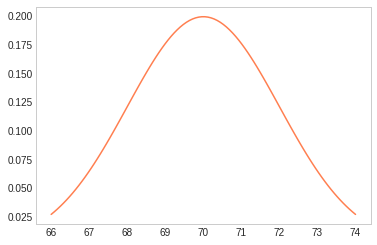

In [51]:
x_min = 66
x_max = 74

mean = 70
std = 2.0

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='coral')

plt.grid()

In [52]:
y_ac = scipy.stats.norm.cdf(x, mean, std)

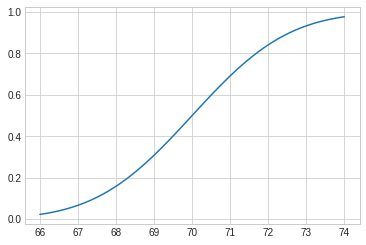

In [53]:
plt.plot(x,y_ac)

## Graficando la función gaussiana.

In [54]:
x_min = 66
x_max = 74

mean = 70
std = 2.0

x = np.linspace(x_min, x_max, 100)
y = (1/(std*(2*np.pi)**0.5))*np.exp(-(x-mean)**2/(2*std**2))

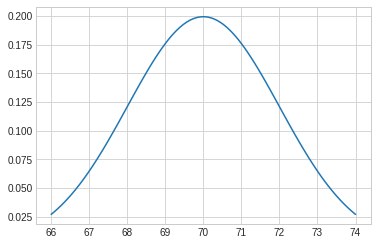

In [55]:
plt.plot(x,y)

Para la acumulada sólo sumamos iterativamente las frecuencias. 

In [56]:
y_ac[0] = 0
for i in range(1,100):
    y_ac[i] = y_ac[i-1] + y[i-1]

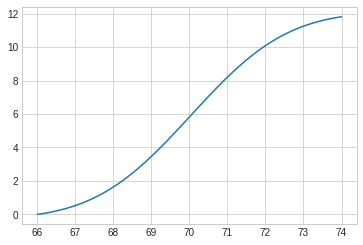

In [57]:
plt.plot(x,y_ac)

In [64]:
y_in = []
#for i in range(1,99):
   # y_in[i-1] = y_ac[i]-y_ac[i-1]

## Salarios en Guanajuato

- ¿Cuál es el promedio de las contribuciones del sueldo de un trabajador en esta dependencia?

In [69]:
tabulador = pd.read_excel('tabulador_pe2019.xls', header = 9)

In [70]:
tabulador.head()

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.07,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.66,760.41,157698.934369,10 Días por Año,45 Días por Año
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.07,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.66,760.41,132939.199042,10 Días por Año,45 Días por Año
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.07,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.66,760.41,108033.486450,10 Días por Año,45 Días por Año
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.07,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.66,760.41,96349.090645,10 Días por Año,45 Días por Año


In [84]:
tabulador.describe()['SUELDO MENSUAL BRUTO'].mean()

56245.526717310335

In [85]:
tabulador.describe()['SUELDO MENSUAL NETO'].mean()

39499.1310069769

- ¿Media y  Moda de las contribuciones del sueldo de un trabajador ? Rango interquartil de la distribución. 

In [86]:
tabulador['SUELDO MENSUAL NETO'].mean()

35829.35357437968

In [87]:
tabulador['SUELDO MENSUAL NETO'].mode()

0    8294.835952
1    9609.786902
dtype: float64

In [88]:
tabulador['SUELDO MENSUAL BRUTO'].mode()

0     9783.850296
1    11440.563407
dtype: float64

In [90]:
tabulador.describe()['SUELDO MENSUAL BRUTO'].loc['25%':'75%']

25%    12353.567028
50%    28148.204516
75%    70240.817524
Name: SUELDO MENSUAL BRUTO, dtype: float64

In [91]:
tabulador.describe()['SUELDO MENSUAL NETO'].loc['25%':'75%']

25%    10289.592141
50%    22078.225282
75%    50363.213596
Name: SUELDO MENSUAL NETO, dtype: float64

- ¿Cuál es la dispersión de sueldos?

In [115]:
mediana = tabulador['SUELDO MENSUAL NETO'].median()

In [105]:
#disp = np.abs(tabulador['SUELDO MENSUAL NETO'].median()- tabulador['SUELDO MENSUAL NETO'])

In [106]:
tabulador.describe()['SUELDO MENSUAL NETO'].loc['25%':'75%']

25%    10289.592141
50%    22078.225282
75%    50363.213596
Name: SUELDO MENSUAL NETO, dtype: float64

Text(0.5, 0, 'Sueldo $')

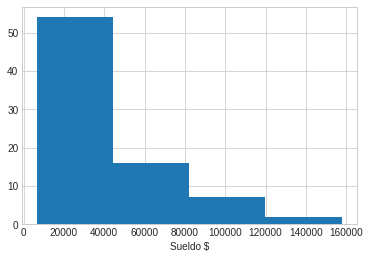

In [107]:
plt.hist(tabulador['SUELDO MENSUAL NETO'], bins = 4);
plt.xlabel('Sueldo $')

In [108]:
tabulador.describe()['SUELDO MENSUAL BRUTO'].loc['25%':'75%']

25%    12353.567028
50%    28148.204516
75%    70240.817524
Name: SUELDO MENSUAL BRUTO, dtype: float64

Text(0.5, 0, 'Sueldo $')

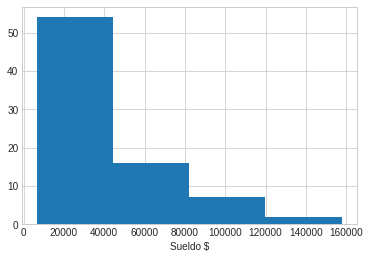

In [109]:
plt.hist(tabulador['SUELDO MENSUAL NETO'], bins = 4);
plt.xlabel('Sueldo $')

(0, 35)

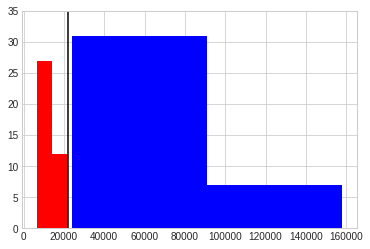

In [127]:
plt.hist(tabulador[tabulador['SUELDO MENSUAL NETO']<mediana]['SUELDO MENSUAL NETO'], bins = 2, color = 'red')
plt.hist(tabulador[tabulador['SUELDO MENSUAL NETO']>mediana]['SUELDO MENSUAL NETO'], bins = 2, color = 'blue')
plt.plot(np.ones(100)*mediana, np.linspace(0,50,100), 'k')
plt.ylim(0,35)

-  ¿Cuál es el sueldo base máximo? 

In [113]:
tabulador.describe()['SUELDO BASE'].max()

59804.3279302758

In [ ]:
- ¿Cuál es el sueldo base mínimo?

In [111]:
tabulador.describe()['SUELDO MENSUAL NETO'].max()

157698.9343690769